### --------- Implementing "Lecun Network" Also called as "LeNet" ---------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time, pickle
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [20]:
from keras import optimizers

In [2]:
import keras.backend as K

def get_categorical_accuracy_keras(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=1), K.argmax(y_pred, axis=1)))


In [3]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2:  'bird',
    3:  'cat',
    4:  'deer',
    5:  'dog',
    6:  'frog',
    7:  'horse',
    8:  'ship',
    9:  'truck'
}

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print("Training Dataset",x_train.shape)
print("Training Label Data",y_train.shape)
print("Test Dataset",x_test.shape)
print("Training Label Datas",y_test.shape)

Training Dataset (50000, 32, 32, 3)
Training Label Data (50000, 1)
Test Dataset (10000, 32, 32, 3)
Training Label Datas (10000, 1)


In [6]:
## Checking the datatype of the train and test sample
print("X_train datatype",x_train.dtype)
print("Y_train_datatye",y_train.shape)

X_train datatype uint8
Y_train_datatye (50000, 1)


In [7]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print('X_train shape: ',x_train.shape[0])
print(x_train.shape[0], 'training samples')
print(x_test.shape[0] , 'validation samples')

X_train shape:  50000
50000 training samples
10000 validation samples


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print("X_train Datatype: ",x_train.dtype)
print("X_test Datatype: ",x_test.dtype)

X_train Datatype:  float32
X_test Datatype:  float32


In [9]:
# Converting the labels to one-hot encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Y_train shape: ',Y_train.shape)
print(Y_train)
print('Y_test shape: ',Y_test.shape)
print(Y_test)

Y_train shape:  (50000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Y_test shape:  (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [10]:
# Viweing the image from the train dataset based on the index id
def draw_img(i):
    im = x_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" %(c, class_name[c]))
    plt.axis('on')

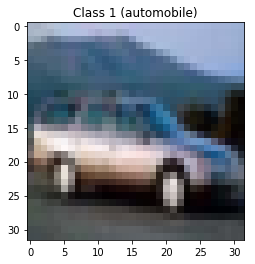

In [12]:
draw_img(4)

In [13]:
# Lets check the first 15 images in a 3x5 grid:
def draw_sample(x, y, n, rows=4, cols=4, imfile = None, fontsize = 12):
    for i in range(0,rows*cols):
        plt.subplot(rows, cols, i+1)
        im = x[n+i].reshape(32,32,3)
        plt.imshow(im, cmap = 'gnuplot2')
        plt.title("{}".format(class_name[y[n+i]]), fontsize = fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace = 0.6,hspace = 0.01)
    if imfile:
        plt.savefig(imfile)

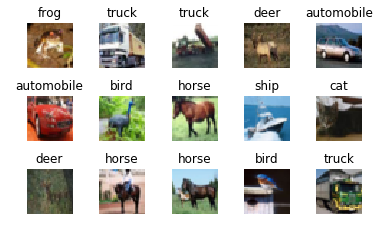

In [14]:
draw_sample(x_train, y_train, 0, 3, 5)

### ---------------- Building the LeNet Arichitecture

In [15]:
# Height and width of the iamges
IMAGE_SIZE = 32
# 3 Channels Red, Green and Blue
CHANNELS = 3

def lenet_model():
    model = Sequential()
    model.add(Conv2D(6, (5,5), padding = 'valid', activation = 'relu', kernel_initializer = 'he_normal', input_shape = (32,32,3)))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    model.add(Conv2D(16, (5,5), padding = 'valid', activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))  
    #sgd = optimizers.SGD(lr = 0.1, momentum = 0.9, nesterov = True)
    #model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = [get_categorical_accuracy_keras])
    #model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])
    
    model.summary()
    
    return(model)   

In [16]:
## Calling the model
model = lenet_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [18]:
#### Save the model after every epochs
checkpoint = ModelCheckpoint('best_model_simple.h5', # Model Filename
                             monitor = 'val_loss', # Quantity to monitor
                             verbose = 0, # Verbosity 0 or 1
                             save_best_only = True, # The latest best model will not be overwritten
                             mode = 'auto') # The decision to overwrite model is made automatically depending on the quantity to monitor

In [21]:
#### Configure the model for training
sgd = optimizers.SGD(lr = 0.1, momentum = 0.9, nesterov = True)    
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = [get_categorical_accuracy_keras])

In [24]:
#### Fit the model on the traing Data
model_details = model.fit(x_train , Y_train,
                         batch_size = 128, # Number of Samples per gradient update
                          epochs = 200, # Number of iterations
                          validation_data = (x_test , Y_test),
                          callbacks = [checkpoint],
                          verbose = 1)


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 48s 963us/step - loss: 2.3056 - get_categorical_accuracy_keras: 0.1029 - val_loss: 2.3042 - val_get_categorical_accuracy_keras: 0.1000
Epoch 2/200
50000/50000 [==============================] - 47s 932us/step - loss: 2.3041 - get_categorical_accuracy_keras: 0.0992 - val_loss: 2.3034 - val_get_categorical_accuracy_keras: 0.1001
Epoch 3/200
50000/50000 [==============================] - 47s 947us/step - loss: 2.3043 - get_categorical_accuracy_keras: 0.0999 - val_loss: 2.3072 - val_get_categorical_accuracy_keras: 0.1000
Epoch 4/200
50000/50000 [==============================] - 46s 926us/step - loss: 2.3043 - get_categorical_accuracy_keras: 0.1009 - val_loss: 2.3036 - val_get_categorical_accuracy_keras: 0.1000
Epoch 5/200
50000/50000 [==============================] - 49s 973us/step - loss: 2.3043 - get_categorical_accuracy_keras: 0.1001 - val_loss: 2.3047 - val_get_categorical_acc

Epoch 43/200
50000/50000 [==============================] - 44s 881us/step - loss: 2.3045 - get_categorical_accuracy_keras: 0.0987 - val_loss: 2.3033 - val_get_categorical_accuracy_keras: 0.1000
Epoch 44/200
50000/50000 [==============================] - 45s 898us/step - loss: 2.3044 - get_categorical_accuracy_keras: 0.0995 - val_loss: 2.3033 - val_get_categorical_accuracy_keras: 0.1000
Epoch 45/200
50000/50000 [==============================] - 44s 886us/step - loss: 2.3042 - get_categorical_accuracy_keras: 0.1006 - val_loss: 2.3049 - val_get_categorical_accuracy_keras: 0.1000
Epoch 46/200
50000/50000 [==============================] - 44s 883us/step - loss: 2.3046 - get_categorical_accuracy_keras: 0.0987 - val_loss: 2.3033 - val_get_categorical_accuracy_keras: 0.1000
Epoch 47/200
50000/50000 [==============================] - 44s 889us/step - loss: 2.3044 - get_categorical_accuracy_keras: 0.0989 - val_loss: 2.3046 - val_get_categorical_accuracy_keras: 0.1000
Epoch 48/200
50000/50000 

50000/50000 [==============================] - 46s 911us/step - loss: 2.3044 - get_categorical_accuracy_keras: 0.0994 - val_loss: 2.3033 - val_get_categorical_accuracy_keras: 0.1000
Epoch 86/200
50000/50000 [==============================] - 45s 907us/step - loss: 2.3040 - get_categorical_accuracy_keras: 0.1000 - val_loss: 2.3042 - val_get_categorical_accuracy_keras: 0.1000
Epoch 87/200
50000/50000 [==============================] - 44s 878us/step - loss: 2.3046 - get_categorical_accuracy_keras: 0.0984 - val_loss: 2.3043 - val_get_categorical_accuracy_keras: 0.1000
Epoch 88/200
50000/50000 [==============================] - 44s 880us/step - loss: 2.3042 - get_categorical_accuracy_keras: 0.1003 - val_loss: 2.3040 - val_get_categorical_accuracy_keras: 0.1000
Epoch 89/200
50000/50000 [==============================] - 44s 875us/step - loss: 2.3040 - get_categorical_accuracy_keras: 0.0996 - val_loss: 2.3046 - val_get_categorical_accuracy_keras: 0.1000
Epoch 90/200
50000/50000 [============

Epoch 127/200
50000/50000 [==============================] - 45s 906us/step - loss: 2.3044 - get_categorical_accuracy_keras: 0.0991 - val_loss: 2.3042 - val_get_categorical_accuracy_keras: 0.1000
Epoch 128/200
50000/50000 [==============================] - 44s 885us/step - loss: 2.3044 - get_categorical_accuracy_keras: 0.0996 - val_loss: 2.3042 - val_get_categorical_accuracy_keras: 0.1000
Epoch 129/200
50000/50000 [==============================] - 46s 913us/step - loss: 2.3042 - get_categorical_accuracy_keras: 0.0998 - val_loss: 2.3036 - val_get_categorical_accuracy_keras: 0.1000
Epoch 130/200
50000/50000 [==============================] - 46s 914us/step - loss: 2.3043 - get_categorical_accuracy_keras: 0.0998 - val_loss: 2.3039 - val_get_categorical_accuracy_keras: 0.1000
Epoch 131/200
50000/50000 [==============================] - 46s 913us/step - loss: 2.3041 - get_categorical_accuracy_keras: 0.0995 - val_loss: 2.3041 - val_get_categorical_accuracy_keras: 0.1000
Epoch 132/200
50000/

Epoch 169/200
50000/50000 [==============================] - 45s 907us/step - loss: 2.3043 - get_categorical_accuracy_keras: 0.1001 - val_loss: 2.3049 - val_get_categorical_accuracy_keras: 0.1000
Epoch 170/200
50000/50000 [==============================] - 48s 956us/step - loss: 2.3042 - get_categorical_accuracy_keras: 0.0990 - val_loss: 2.3034 - val_get_categorical_accuracy_keras: 0.1000
Epoch 171/200
50000/50000 [==============================] - 46s 912us/step - loss: 2.3043 - get_categorical_accuracy_keras: 0.1016 - val_loss: 2.3028 - val_get_categorical_accuracy_keras: 0.1000
Epoch 172/200
50000/50000 [==============================] - 46s 911us/step - loss: 2.3041 - get_categorical_accuracy_keras: 0.0993 - val_loss: 2.3032 - val_get_categorical_accuracy_keras: 0.1000
Epoch 173/200
50000/50000 [==============================] - 46s 921us/step - loss: 2.3041 - get_categorical_accuracy_keras: 0.0994 - val_loss: 2.3052 - val_get_categorical_accuracy_keras: 0.1000
Epoch 174/200
50000/

In [27]:
# Predict the class for test set images
class_pred = model.predict(x_test,batch_size = 32)
print(class_pred[0])


[0.10624    0.09559857 0.0997432  0.10866427 0.10213409 0.09659193
 0.09550215 0.09809291 0.09911374 0.09831913]


In [28]:
# Get the index of the largest element in each vector
labels_pred = np.argmax(class_pred ,axis = 1)
print(labels_pred)


[3 3 3 ... 3 3 3]


In [29]:
# Calculating the Model Accuracy of train dataset
loss, accuracy = model.evaluate(x_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))


Training: accuracy = 0.100000  ;  loss = 2.303450


In [32]:
# Calculating the Model Accuracy of test dataset
loss, accuracy = model.evaluate(x_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))


Validation: accuracy1 = 0.100000  ;  loss1 = 2.303450


In [33]:
y_pred = model.predict_classes(x_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [34]:
# Calculating the correctly classified and misclassified images
true_preds = [(x,y) for (x,y,p) in zip(x_test , y_test , y_pred) if y == p]
false_preds = [(x,y,p) for (x,y,p) in zip(x_test , y_test , y_pred) if y != p]

print("Number of True Predictions: ",len(true_preds))
print("Number of False Predictions: ",len(false_preds))

Number of True Predictions:  1000
Number of False Predictions:  9000


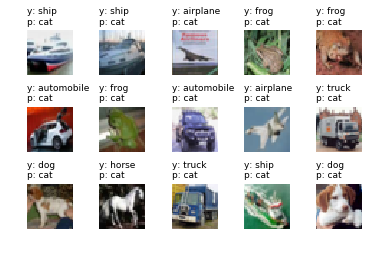

In [35]:
for i,(x,y,p) in enumerate(false_preds[0:15]):
    plt.subplot(3,5, i+1)
    plt.imshow(x, cmap = 'gnuplot2')
    plt.title("y: %s\np: %s" %(class_name[y] , class_name[p]) , fontsize = 9,loc = "left")
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.6, hspace = 0.2)
